# CNN(합성곱 신경망: Convolution Neural Network) 과 빌딩 연습

_아 많이왔다. 이제 진짜다. 시계열 복습을 위한 최종 단계에 이르렀다. CNN, RNN, Auto-Encoder, GAN 차례로 공부할 예정._

CNN은 합성곱 신경망이다. 합성곱이라는 연산을 사용하는 신경망이다. 특히 이미지 분류 작업에서 좋은 성능을 보여준다.

일부는 wiki를 참조하였다. : 

        https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D
        https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1

---

### 합성곱(convolution)

$$ y(i) = (x*w)(i)=\Sigma _{{k = -\infty }}^{\infty }x(k)w(i-k)$$

합성곱 연산은 i시점의 인풋 데이터 x값과 가중치 w값의 합성곱 연산의 결과는 y(i)와 같음을 나타낸다. k도 시점을 나타내는 상태인데, 가중치 w의 시점은 w(i)가 아니라, w(i-k)이다. 

이를 **플립(flip)**이라고 하며, 가중치의 시점을 뒤집는다는 뜻이다. 가중치는 **커널(kernel)**이라고도 부른다. 합성곱이라는 연산의 정의 자체가 가중치를 플립하는 연산이다.

위 식은 시점의 순서에 상관없이 결과가 동일하기 때문에 아래처럼 쓸 수 있다. (wiki에서 합성곱에 대하여 이야기할 때는 '적분'한다고 표현하며, 시그마 대신 인테그랄이 그려져있다.)

$$ y(i) = (x*w)(i)=\Sigma _{{k = -\infty }}^{\infty }x(i-k)w(k)$$

위의 두 식을 2차원 공간으로 넓힌다면 아래와 같은 식이 된다.

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(k_{1}, k_{2}) W(i-k_{1}, j-k_{2})$$

합성곱 연산은 시점의 순서에 상관없이 결과가 동일하므로 아래같은 표현도 성립한다. 

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(i-k_{1}, j-k_{2}) W(k_{1}, k_{2})$$

현실적으로는 앞의 연산보다 가중치, 즉 커널을 플립하지 않은 연산을 더 많이 사용한다. 아래와 같은 연산을 **cross-correlation**이라고 부른다.

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(i+k_{1}, j+k_{2}) W(k_{1}, k_{2})$$

주의할 점은 좌표를 계산할 때 0부터 계산한다. 행렬에서 1행 1열은 (0, 0) 좌표인 것이다.

입력 데이터와 합성곱 연산을 수행하게 되는 행렬을 커널이라고 부르는데, 이것이 가중치인 것이다.

4x4행렬과 2x2커널의 합성곱을 연산한 결과 3x3크기의 출력 데이터가 나온다. 즉, **합성곱 연산 결과 데이터의 차원이 줄어든다.**

**편향이 존재할 떄에는 입력 데이터와 커널을 합성곱 한 후 각 행렬 원소에 편향을 더하게 된다.**

### 패딩(padding)

신경망에 커널을 적용하면서, 층이 깊어질수록 데이터의 차원이 줄어들게 된다. 그렇게 차원이 줄어드는 현상을 방지하기 위해 패딩이라는 방법을 사용한다. 

말하자면 입력 데이터 행렬의 주변(첫 행, 열, 마지막 행, 열)에 0 같은 특정 값으로 채우는 것을 의미한다.

### 스트라이드(stride)

한 번 합성곱 연산한 후 다음 계산 영역을 선택할 때 얼마나 이동할지 간격을 정하는 값이다. 1이면 한 행(열)만 이동하고, 2면 두 행(열)을 이동하며 합성곱을 수행한다.

이때 스트라이드 2가되면 스트라이드1일 때보다 출력 데이터 행렬의 차원이 더 작아진다.

패딩과 스트라이드 관련하여 출력 데이터의 크기를 미리 계산해볼 수 있다. 
$$ 합성곱 결과 행(열) = \frac { 입력 행렬 행(열) 크기 - 커널 차원 행(열) 크기 + 2 \times 패딩 차원 행(열) 크기 } { 스트라이드 차원 행(열) 크기 } + 1$$


### 풀링(pooling)
데이터의 차원을 줄이는 방법이다. 풀링에는 여러 종류가 있는데, 맥스 풀링을 사용하면 이렇다. (행렬 인덱스를 가정하고 적어본다.)

예시로 4x4 입력 행렬에서 스트라이드 2인 경우를 가정하고 맥스풀링을 적용하면, 2x2 크기의 [0,0]~[1,1] 에서 MAX 값이 출력값 [0,0] 이 된다.

그리고 [0,2] ~ [1,3]에서 가장 큰 값이 출력값 [0,1], 그리고 [2,0] ~ [3,1]에서 가장 큰 값이 출력값 [1,0], 그리고 [2,2] ~ [3,3]에서 가장 큰 값이 출력값[1,1]이 된다.


## 텐서(고차원)에서의 합성곱

보통의 입력 데이터는 너비(width)와 높이(height) 뿐만 아니라 채널(channel)도 고려한다. 이미지 데이터의 경우 하나의 픽셀값에 대해 RGB 각 세가지 값이 있다. 다시 말해, 한 이미지가 행렬로 존재할 때 한 픽셀(한 원소)값은 (R, G, B)식으로 3차원으로 나타난다. 

입력 데이터가 고차원이므로 커널도 채널 수만큼 필요하다.

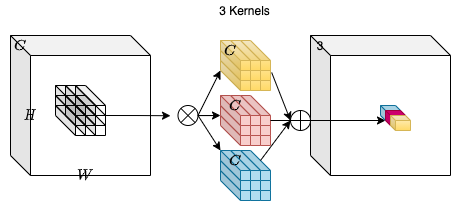 
출처: https://keras.io/examples/vision/involution/

위 이미지는 커널 수가 여러개인 경우를 나타낸다. 커널 수가 많아지는 경우 출력 데이터의 채널 수가 커널 수 만큼 많아진다.

만약 편향이 존재한다면 편향은 초반의 예시처럼 한 scalar값이 아니라 (채널 수 길이의) vector가 될 것이다. 

차원이 커질 수록 for문을 많이 쓰면서 연산을 수행하는 장비에 무리가 갈 수 있다. 그렇기에 고차원 데이터를 합성곱 할 때는 2차원 평면으로 변형해서 표현하기도 한다.

고차원 커널도 2차원 행렬로 표현이 가능하다. 즉 텐서x텐서가 행렬x벡터의 형태로 단순하게 바뀌는 것이다.

만약 커널 수가 늘어나면, 연산해야할 벡터의 개수가 늘어나는 것이다. 행렬x벡터1, 행렬x벡터2 식이 된다.




##### 12.4.6 합성곱 신경망 실습

합성곱 신경망을 이용해 손글씨 인식 모형을 생성한다.

# Random seed setting and Load Data, Libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [3]:
# data load
# mnist data는 텐서플로에서 제공하는 데이터 셋이다. 불러올 때 트레이닝/테스트를 나누어서 불러올 수 있다.

from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# dimension check

print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


X는 (이미지 개수, 행, 열) 형태이다.

타겟 트레이닝 데이터 y는 스칼라값 6만개로 이루어진 벡터이다.

# Origin data visualization

오리지널 데이터 일부 10개를 가져와서 그린다. 서브플롯을 설정해서 그린다.

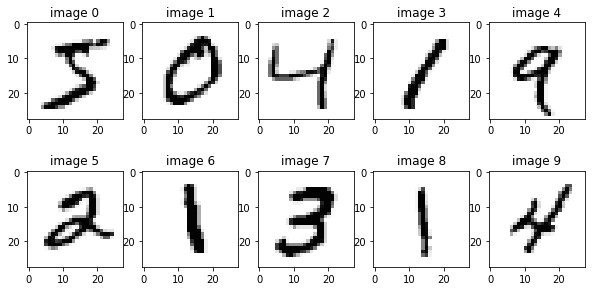

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28,28)), cmap = 'Greys')
    plt.title("image {}".format(i))

plt.show()

# Checking Target Class 
0부터 9까지의 숫자이다. 구분(분류)하는 형태이다.

In [8]:
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Reshaping feature and target data

## Rescaling feature data

데이터는 (이미지 개수, 행, 열) 형태로, 3차원이다.  
합성곱 신경망에 넣기 위해서는 4차원 형태로 구성되어야 한다. 

합성곱 신경망 인풋 데이터의 차원은 (이미지 개수, 행, 열, 채널수) 의 형태로 구성되는데, 이때 채널은 보통 이미지의 RGB 값이 된다.

mnist 데이터는 채널 1개의 흑백 데이터이다. 따라서 채널수는 1이 된다.

In [9]:
# 트레이닝 피처 데이터의 차원 바꾸기 (이미지 개수, 행, 열, 채널수)
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)

# 이미지 픽셀값이 0~255 사이에 분포해 있기 때문에 최댓값이 1이 되도록 조정하면 딥러닝 성능 향상에 도움이 된다
X_tn = X_tn_re / 255

# 바뀐 데이터 차원 확인
print(X_tn.shape)

(60000, 28, 28, 1)


In [11]:
# 같은 방식으로 테스트 피처 데이터 차원 reshape
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re / 255
print(X_te.shape)

(10000, 28, 28, 1)


## one-hot encoding Target Data

In [12]:
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

# Building CNN model

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [15]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense, Conv2D      # 신경망 층 추가 및 합성곱 함수 임포트
from tensorflow.keras.layers import MaxPool2D, Flatten # 맥스풀링 층
from tensorflow.keras.layers import Dropout

# 분류될 최종 클래스 개수
n_class = len(set(y_tn0))

# 모형 생성 및 신경망 층 빌딩
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), input_shape = (28,28,1),
                padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))  # 사용하지 않을 노드의 비율
model.add(Flatten())      # 행렬 형태를 벡터 형태로 펼침

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(n_class, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

##### Conv2D()
    model.add(Conv2D(32, kernel_size = (5,5), input_shape(28,28,1),
                    padding = 'valid', activation = 'relu'))


32 는 아웃풋 데이터의 차원. 32개의 이미지 데이터가 출력된다는 뜻이다. 커널사이즈는 커널 사이즈.

input_shape: 인풋 데이터의 차원을 의미한다. Mnist데이터의 각 이미지는 28행 28열 1채널이기 때문에 (28,28,1) 을 쓴다.

padding : valid와 same 선택. valid는 패딩을 하지 않음, same은 입력 데이터와 크기가 동일하게 조정되는 것.

##### MaxPool2D

풀링 사이즈를 pool_size로 조정.

##### Dropout 

사용하지 않을 노드의 비율을 의미한다. 

##### Flatten

최종 아웃풋 형태를 고려해여 행렬 형태의 데이터를 벡터 형태로 펼친다.


## model compile

In [16]:
model.compile(loss = 'categorical_crossentropy',   # 손실함수: 다중분류
              optimizer = 'adam',                  # 옵티마이저와 평가기준
              metrics = ['accuracy'])

## model learning

In [17]:
hist = model.fit(X_tn, y_tn, epochs = 3, batch_size = 100)  # batch_size: learning mini batch size at one ephoch

Epoch 1/3
600/600 [==============================] - 57s 94ms/step - loss: 0.1621 - accuracy: 0.9506
Epoch 2/3
600/600 [==============================] - 50s 84ms/step - loss: 0.0586 - accuracy: 0.9823
Epoch 3/3
600/600 [==============================] - 51s 85ms/step - loss: 0.0417 - accuracy: 0.9867


# Evaluation

accuracy를 따라 평가해본다. 트레이닝 데이터와 테스트 데이터로 정확도를 평가해본다.

In [18]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0190 - accuracy: 0.9948
0.9947666525840759
313/313 [==============================] - 4s 12ms/step - loss: 0.0316 - accuracy: 0.9887
0.9886999726295471


상당히 좋은 결과이다. 와우...

## Wrong answers

테스트 피처 데이터를 통해 오답 데이터를 확인해본다.

--- 

코드설명: 

    예측 데이터는 원핫인코딩 형태이다. 원핫 인코딩 형태가 아닌 원본 숫자 형태로 바꾸어 출력한다.
    np.argmax를 통해 쉽게 원본 숫자로 바꿀 수 있다.
    바꾼 뒤 실젯값과 예측값의 차이를 구하는데, 이를 diff로 설정한다. diff가 0인지 아닌지 따라 본다.
    몇 번째 테스트 피처 데이터가 0이 아닌지를 저장하기 위해 인덱스 저장할 리스트를 생성하고, 
    반복문을 만들기 위해 테스트 타깃 데이터의 길이를 저장한다(그들을 다 훑는다).
    0이 아닌 녀석의 인덱스를 리스트에 추가해둔다.


In [19]:
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])

313/313 [==============================] - 4s 12ms/step
[6.7081466e-08 2.6774404e-07 1.5925344e-06 8.5497586e-06 5.3426104e-09
 2.1562940e-08 3.6584718e-11 9.9998152e-01 1.1951147e-06 6.8251788e-06]


In [20]:
import numpy as np

y_pred = np.argmax(y_pred_hot, axis = 1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [21]:
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)

for i in range(0, y_len):
    if(diff[i] != 0):
        diff_idx.append(i)

## Wrong answers visualization

원본 데이터 체크할 때처럼 반복문을 사용하여 서브플롯을 만들어준다.

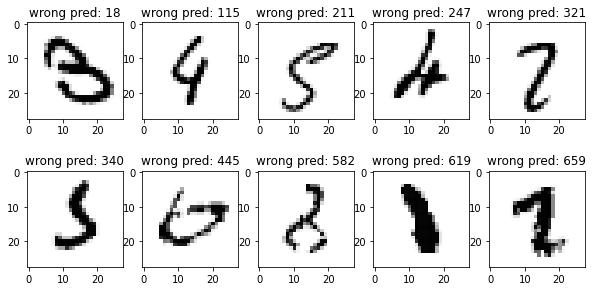

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28,28)), cmap = 'Greys')
    plt.title("wrong pred: {}".format(raw_idx))

plt.show()

In [27]:
len(diff_idx)

113

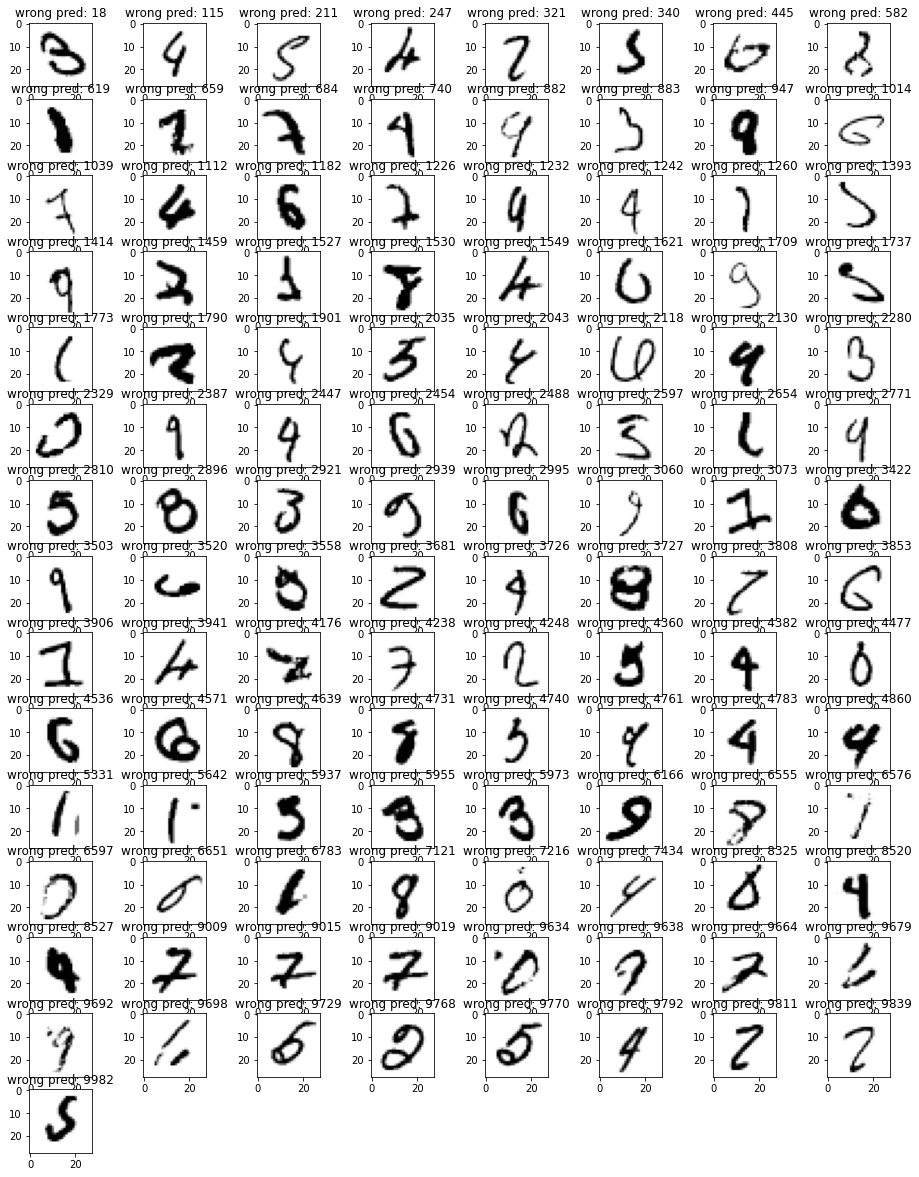

In [37]:
# 틀린 데이터 전체를 데려와보기로 한다.

idx = len(diff_idx)
idx_round = int(round(idx/5, 0))

import matplotlib.pyplot as plt

plt.figure(figsize = (16,32))
for i in range(idx):
    plt.subplot(idx_round, 8, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28,28)), cmap = 'Greys')
    plt.title("wrong pred: {}".format(raw_idx))

plt.show()

# Whole Code